In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from pathlib import Path

In [4]:
import pickle

In [5]:
import numpy as np
import torch

In [6]:
import matplotlib.pyplot as plt

In [7]:
from analyze import analyze_gexf

In [8]:
import networkx

In [9]:
import os
import shutil

In [10]:
import glob

In [11]:
def picklify(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)

def unpicklify(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [12]:
ws = unpicklify('./lth_mlp5_mnist/mnist-mlp-iter10-weights.pckl')

In [13]:
type(ws)

tuple

In [15]:
for w in ws:
    print(w.shape)

(784, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 10)


In [12]:
def net_filter_network(neuron_network, draw=False):
    node_list = []
    edge_list = []
    nodes_num = 0
    # nodes_num=nodes_num+(neuron_network.conv.in_channels)*(neuron_network.conv.out_channels)
    # node_list.append(len(node_list)+np.arange(neuron_network.conv.in_channels + neuron_network.conv.out_channels))

    nx_new = networkx.Graph()
    for l, w in enumerate(neuron_network):
        dim_in, dim_out = w.shape
        
        if l == 0:
            idx_in_start = 0
            idx_out_start = dim_in
        else:
            idx_in_start = idx_out_start
            idx_out_start = idx_out_start + dim_in
        
        for i in range(dim_in):
            for j in range(dim_out):
                idx_in = idx_in_start + i
                idx_out = idx_out_start + j
                edge_w = np.abs(w[i,j])
                if edge_w > 0:
                    nx_new.add_weighted_edges_from([(idx_in, idx_out, edge_w)])
        
        if l == 0:
            nodes_num += dim_in + dim_out
            node_list.append(list(len(node_list) + np.arange(dim_in + dim_out)))
        else:
            nodes_num += dim_out
            node_list.append(list(len(node_list) + np.arange(dim_out)))

    if draw:
        networkx.draw(nx_new)

        # plt.title('SF Network')
        plt.savefig('sf_base.svg',format='svg')
        plt.savefig('sf_base.png',format='png')
    return nx_new  #, node_list, nodes_num

In [41]:
networkx.write_gexf(nx, 'test.gexf')  # .format(idx,1-sparsity))

In [44]:
res = analyze_gexf('./test.gexf')

./test.gexf


ZeroDivisionError: division by zero

In [46]:
ll = networkx.betweenness_centrality(nx, weight='weight')

In [48]:
sum([ll[keyname] for keyname in ll.keys()])/len(ll)

0.0010004499776526924

In [49]:
nnx = networkx.read_gexf('./test.gexf')

In [50]:
lll = networkx.betweenness_centrality(nnx, weight='weight')

In [51]:
sum([lll[keyname] for keyname in lll.keys()])/len(lll)

0.0010004499776526924

In [8]:
os.makedirs('./lth_mlp5_mnist_gexf_logs')

In [14]:
for pckl_fn in glob.glob('./lth_mlp5_mnist/*.pckl'):
    ws = unpicklify(pckl_fn)
    base_pckl_fn = os.path.basename(pckl_fn).split('.')[0]
    nx = net_filter_network(ws)
    networkx.write_gexf(nx, os.path.join('./lth_mlp5_mnist_gexf_logs', base_pckl_fn+'.gexf'))

In [15]:
lth_mlp5_mnist_betweeness_res = {}
for gexf_fn in glob.glob('./lth_mlp5_mnist_gexf_logs/*.gexf'):
#     nx = networkx.read_gexf(gexf_fn)
    base_fn = os.path.basename(gexf_fn).split('.')[0]
    lth_mlp5_mnist_betweeness_res[base_fn] = analyze_gexf(gexf_fn)

./lth_mlp5_mnist_gexf_logs\mnist-mlp-init-weights.gexf
0.47479942486876264 0.003449542116838755 1.8166734565508923e-05
./lth_mlp5_mnist_gexf_logs\mnist-mlp-iter1-weights.gexf
0.44976224272471443 0.0008677393466752302 8.051987363357567e-06
./lth_mlp5_mnist_gexf_logs\mnist-mlp-iter10-weights.gexf
0.3766920937080089 0.0010004499776526924 6.243463591905832e-05
./lth_mlp5_mnist_gexf_logs\mnist-mlp-iter2-weights.gexf
0.43246372398250876 0.000811069380924112 9.662868558522854e-06
./lth_mlp5_mnist_gexf_logs\mnist-mlp-iter3-weights.gexf
0.4190398546477099 0.0008195690756272415 1.2153823887920195e-05
./lth_mlp5_mnist_gexf_logs\mnist-mlp-iter4-weights.gexf
0.41241689224728756 0.0008620675837502047 1.518974692929921e-05
./lth_mlp5_mnist_gexf_logs\mnist-mlp-iter5-weights.gexf


KeyboardInterrupt: 

In [16]:
for k,v in lth_mlp5_mnist_betweeness_res.items():
    print(k ,v)

mnist-mlp-init-weights [0.47479942486876264, 0.003449542116838755, 1.8166734565508923e-05]
mnist-mlp-iter1-weights [0.44976224272471443, 0.0008677393466752302, 8.051987363357567e-06]
mnist-mlp-iter10-weights [0.3766920937080089, 0.0010004499776526924, 6.243463591905832e-05]
mnist-mlp-iter2-weights [0.43246372398250876, 0.000811069380924112, 9.662868558522854e-06]
mnist-mlp-iter3-weights [0.4190398546477099, 0.0008195690756272415, 1.2153823887920195e-05]
mnist-mlp-iter4-weights [0.41241689224728756, 0.0008620675837502047, 1.518974692929921e-05]


In [22]:
lth_mlp5_mnist_closeness_list = [
    0.44976224272471443,
    0.43246372398250876,
    0.4190398546477099,
    0.41241689224728756,
    0.40441337425118085,
    0.3976374184849007,
    0.3928990839061981,
    0.38868926679367166,
    0.3834030390721528,
    0.3766920937080089,    
]

In [23]:
lth_mlp5_mnist_betweeness_list = [
    0.0008677393466752302,
    0.000811069380924112,
    0.0008195690756272415,
    0.0008620675837502047,
    0.0008823198827320599,
    0.000905440100088289,
    0.0009264141789381597,
    0.0009456781797788057,
    0.0009678604741833672,
    0.0010004499776526924,
]

In [24]:
lth_mlp5_mnist_edge_list = [
    8.051987363357567e-06,
    9.662868558522854e-06,
    1.2153823887920195e-05,
    1.518974692929921e-05,
    1.9193498016878236e-05,
    2.430142743667805e-05,
    3.068270064199752e-05,
    3.87281797612961e-05,
    4.907209629821911e-05,
    6.243463591905832e-05,
]

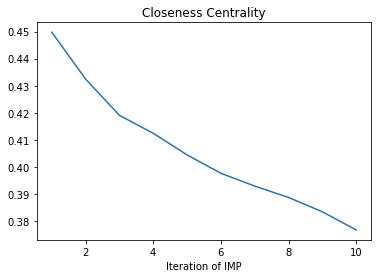

In [26]:
plt.close()

plt.plot(range(1, 11), lth_mlp5_mnist_closeness_list)

plt.title('Closeness Centrality')
plt.xlabel('Iteration of IMP')

plt.show()

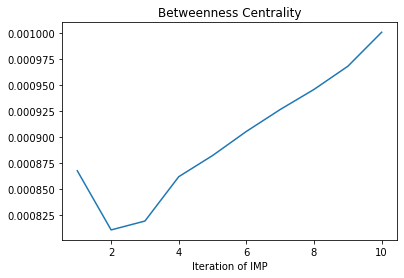

In [27]:
plt.close()

plt.plot(range(1, 11), lth_mlp5_mnist_betweeness_list)

plt.title('Betweenness Centrality')
plt.xlabel('Iteration of IMP')

plt.show()

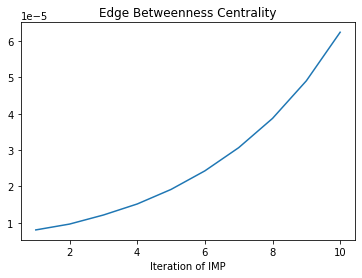

In [28]:
plt.close()

plt.plot(range(1, 11), lth_mlp5_mnist_edge_list)

plt.title('Edge Betweenness Centrality')
plt.xlabel('Iteration of IMP')

plt.show()

In [3]:
import networkx as nx

In [5]:
net_init = nx.read_gexf('./lth_mlp5_mnist_gexf_logs/mnist-mlp-init-weights.gexf')

In [9]:
net_lth_iter0 = nx.read_gexf('./lth_mlp5_mnist_gexf_logs/mnist-mlp-unpruned-weights.gexf')

In [79]:
net_lth_wt = nx.read_gexf('./lth_mlp5_mnist_gexf_logs/mnist-mlp-lt-weights.gexf')

In [6]:
from analyze import analyze_gexf

In [7]:
nbc_init, ebc_init, cc_init = analyze_gexf(net_init)

In [23]:
nbc_lth_iter0, ebc_lth_iter0, cc_lth_iter0 = analyze_gexf(net_lth_iter0)

In [80]:
nbc_lth_wt, ebc_lth_wt, cc_lth_wt = analyze_gexf(net_lth_wt)

In [61]:
ebc_weight_pairs_init = []
for (u, v), c in ebc_init.items():
    ebc_weight_pairs_init.append((net_init[u][v]['weight'], c))
ebc_weight_pairs_init = np.array(ebc_weight_pairs_init)

In [81]:
ebc_weight_pairs_lth_wt = []
for (u, v), c in ebc_lth_wt.items():
    ebc_weight_pairs_lth_wt.append((net_lth_wt[u][v]['weight'], c))
ebc_weight_pairs_lth_wt = np.array(ebc_weight_pairs_lth_wt)

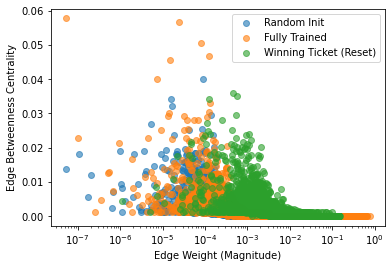

In [83]:
plt.close()

plt.scatter(ebc_weight_pairs_init[:,0], ebc_weight_pairs_init[:,1], alpha=0.6, label='Random Init')
plt.scatter(ebc_weight_pairs_lth_iter0[:,0], ebc_weight_pairs_lth_iter0[:,1], alpha=0.6, label='Fully Trained')
plt.scatter(ebc_weight_pairs_lth_wt[:,0], ebc_weight_pairs_lth_wt[:,1], alpha=0.6, label='Winning Ticket (Reset)')

plt.xscale('log')

# plt.title('Random Initialization')
plt.xlabel('Edge Weight (Magnitude)')
plt.ylabel('Edge Betweenness Centrality')
plt.legend()

plt.show()

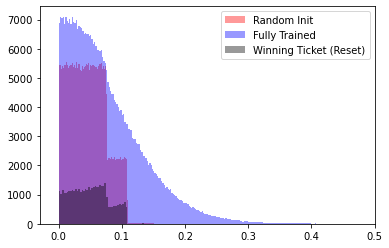

In [84]:
plt.close()

plt.hist(ebc_weight_pairs_init[:,0], bins='auto', alpha=0.4, color='red', label='Random Init')
plt.hist(ebc_weight_pairs_lth_iter0[:,0], bins='auto', alpha=0.4, color='blue', label='Fully Trained')
plt.hist(ebc_weight_pairs_lth_wt[:,0], bins='auto', alpha=0.4, color='black', label='Winning Ticket (Reset)')

plt.xlim([-0.03, 0.5])
plt.legend()

plt.show()

In [64]:
ebc_weight_pairs_lth_iter0 = []
for (u, v), c in ebc_lth_iter0.items():
    ebc_weight_pairs_lth_iter0.append((net_lth_iter0[u][v]['weight'], c))
ebc_weight_pairs_lth_iter0 = np.array(ebc_weight_pairs_lth_iter0)

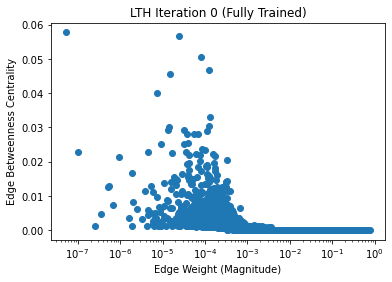

In [65]:
plt.close()

plt.scatter(ebc_weight_pairs_lth_iter0[:,0], ebc_weight_pairs_lth_iter0[:,1])

plt.xscale('log')

plt.title('LTH Iteration 0 (Fully Trained)')
plt.xlabel('Edge Weight (Magnitude)')
plt.ylabel('Edge Betweenness Centrality')

plt.show()

In [11]:
net_init.number_of_nodes()

1818

In [14]:
weights_init = unpicklify('./lth_mlp5_mnist/mnist-mlp-init-weights.pckl')

In [13]:
weights_lth_iter0 = unpicklify('./lth_mlp5_mnist/mnist-mlp-unpruned-weights.pckl')

In [17]:
weights_init[-1] - weights_lth_iter0[-1]

array([[ 0.05092029,  0.1127881 ,  0.02290374, ...,  0.08546477,
        -0.0232379 , -0.01525614],
       [ 0.04179363,  0.01512849,  0.00728056, ...,  0.03729743,
        -0.00577423, -0.04262782],
       [ 0.3176878 ,  0.0133474 ,  0.19858626, ..., -0.04612898,
         0.08428691, -0.02840899],
       ...,
       [ 0.06967698, -0.04176863, -0.014216  , ...,  0.049161  ,
        -0.02217388,  0.03622837],
       [ 0.1756948 , -0.02671311,  0.00968967, ...,  0.0764975 ,
         0.00599454, -0.01449211],
       [ 0.04612224, -0.03518488, -0.04965964, ...,  0.06021478,
        -0.03057112,  0.04216019]], dtype=float32)

In [22]:
nz = 0
for w in weights_init:
    nz = np.sum(nz == 0.0)
print(nz)

1
